# Numerical Exercise 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


2024-06-20 13:02:54.521125: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [2]:
N_epochs = 30
N_train = 1000 # <<< train
N_valid = 50 # <<< test
sigma = 0.5

# f(x) = a*x^3 + b*x^2 + c*x + d
def f(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

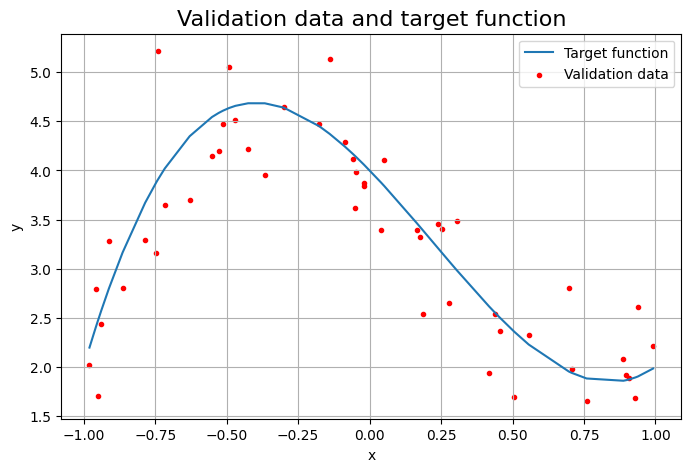

In [3]:
# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = f(x = x_valid)

y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.figure(figsize = (8,5))
plt.plot(x_valid, y_target, label = "Target function")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

In [4]:

models = []
history = []
act = ['relu', 'elu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'exponential']
for i in range(len(act)):
    model = tf.keras.Sequential()
    model.add(Dense(40, input_shape = (1,), activation = act[i]))
    model.add(Dense(20, activation = act[i]))
    model.add(Dense(1, activation = 'linear'))
    # available optimizers: 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam'
    # adam performs the best for this problem, adamw adn nadam curiousely does not perform well
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
    models.append(model)

    history.append(models[i].fit(x = x_train, y = y_train, batch_size = 32, epochs = N_epochs, shuffle = True,
                    validation_data = (x_valid, y_valid)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-20 13:02:56.009115: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 13:02:56.013439: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

Epoch 1/30


I0000 00:00:1718888577.043607  395469 service.cc:145] XLA service 0x7f7f8c005940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718888577.043629  395469 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-06-20 13:02:57.065758: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-20 13:02:57.158390: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 1/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 9.9672 - mse: 9.9672

I0000 00:00:1718888577.583700  395469 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 12.1306 - mse: 12.1328 - val_loss: 8.3096 - val_mse: 9.3304
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6856 - mse: 9.6878 - val_loss: 5.3995 - val_mse: 6.2234
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3412 - mse: 6.3444 - val_loss: 2.4979 - val_mse: 2.9571
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9058 - mse: 2.9079 - val_loss: 1.3383 - val_mse: 1.5177
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5125 - mse: 1.5123 - val_loss: 1.0967 - val_mse: 1.2912
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1164 - mse: 1.1171 - val_loss: 0.8965 - val_mse: 1.0710
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8514 - mse: 0.8509 - val_loss: 0.7550 - val_mse: 0.9062
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8026 - mse: 0.8028 - val_loss: 0.6293 - val_mse: 0.7496
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6168 - mse: 0.6171 -

In [5]:
for i in range(len(act)):
    print("Model with activation function: {c} , {act}".format(c=i, act=act[i]))
    w = models[i].get_weights()

    score = models[i].evaluate(x_valid, y_valid, batch_size = 32, verbose = 0)
    print('Test loss:\t\t', score[0])
    print('Test accuracy:\t\t', score[1])

    score = models[i].evaluate(x_valid, y_target, batch_size = 32, verbose = 0)
    print('Test loss exact:\t', score[0])
    print('Test accuracy exact:\t', score[1])


Model with activation function: 0 , relu
Test loss:		 0.21902963519096375
Test accuracy:		 0.23104602098464966
Test loss exact:	 0.013190588913857937
Test accuracy exact:	 0.015754012390971184
Model with activation function: 1 , elu
Test loss:		 0.34466302394866943
Test accuracy:		 0.34646180272102356
Test loss exact:	 0.11848539859056473
Test accuracy exact:	 0.12210921943187714
Model with activation function: 2 , sigmoid
Test loss:		 0.6408266425132751
Test accuracy:		 0.7294853925704956
Test loss exact:	 0.4874046742916107
Test accuracy exact:	 0.5690506100654602
Model with activation function: 3 , softmax
Test loss:		 1.790941834449768
Test accuracy:		 2.180903673171997
Test loss exact:	 1.8763504028320312
Test accuracy exact:	 2.3264429569244385
Model with activation function: 4 , softplus
Test loss:		 0.6790114641189575
Test accuracy:		 0.807759165763855
Test loss exact:	 0.5055612325668335
Test accuracy exact:	 0.6330921649932861
Model with activation function: 5 , softsign
Test

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


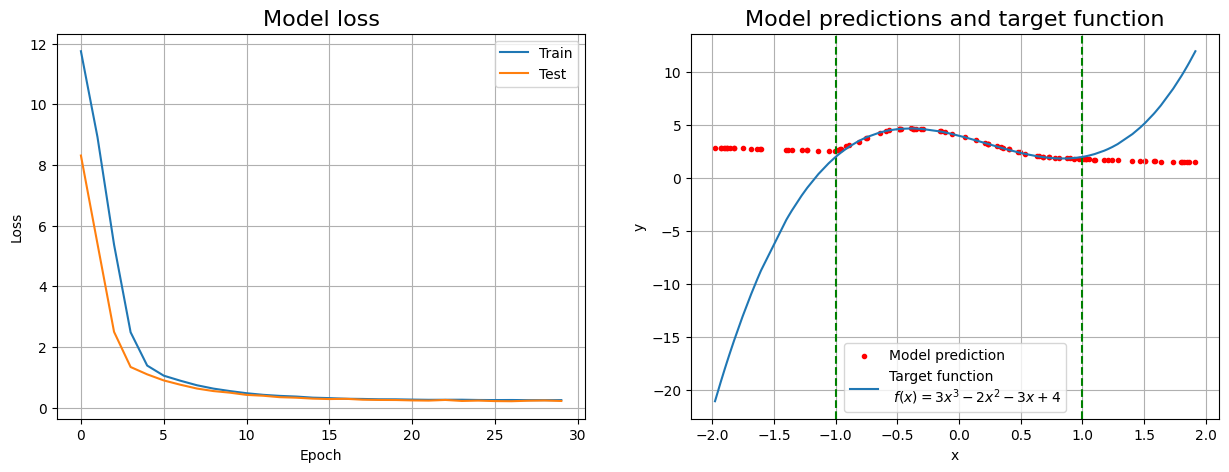

In [6]:
sel = 0

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(history[sel].history['loss'])
plt.plot(history[sel].history['val_loss'])
plt.title('Model loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'best')
plt.grid()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-2, 2, 100) 
y_predicted = models[sel].predict(x_predicted)

plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted)
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()